# Model Training

Sections:
- Google Translate Models
- M2M-100 Models
- ChatGPT Models
- ChatGPT Reworded Models
- mBART Models

In [1]:
!pip install transformers --quiet
!pip install datasets --quiet
!pip install sentencepiece --quiet
!pip install torch --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Testing

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Sun Mar 26 06:26:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch

device = torch.device('cuda')

tensor = torch.tensor([1, 2, 3])

print("Before moving to GPU:", tensor)

tensor = tensor.to(device)

print("After moving to GPU:", tensor)

Before moving to GPU: tensor([1, 2, 3])
After moving to GPU: tensor([1, 2, 3], device='cuda:0')


In [ ]:
!pip uninstall torch
!pip install torch torchvision -f https://download.pytorch.org/whl/cu118/torch_stable.html
import torch
torch.__version__

## Imports

In [3]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import MBartForConditionalGeneration, MBartTokenizer, MBart50TokenizerFast
from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer
from datasets import load_dataset
import pandas as pd
import nltk
import copy

In [4]:
%%capture
# swahili to english tokenizer
train_model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

In [5]:
%%capture
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt", src_lang="sw_KE", tgt_lang="en_XX")

In [6]:
%%capture
sw_test_flores = load_dataset("facebook/flores", 'swh_Latn')
en_test_flores = load_dataset("facebook/flores", 'eng_Latn')

src_eval_texts = sw_test_flores['dev']['sentence'] + sw_test_flores['devtest']['sentence']
tgt_eval_texts = en_test_flores['dev']['sentence'] + en_test_flores['devtest']['sentence']

src_lang, tgt_lang = 'sw_KE', 'en_XX'

val_src_texts, val_tgt_texts = src_eval_texts[:256], tgt_eval_texts[:256]

## Testing

In [ ]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
torch.cuda.device_count()

1

In [ ]:
import torch

device = torch.device('cuda')

tensor = torch.tensor([1, 2, 3])

print("Before moving to GPU:", tensor)

tensor = tensor.to(device)

print("After moving to GPU:", tensor)


Before moving to GPU: tensor([1, 2, 3])
After moving to GPU: tensor([1, 2, 3], device='cuda:0')


In [ ]:
train_model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

In [ ]:
device = torch.device('cpu')

swahili_phrase = "MKUTANO WA BIASHARA Je Ungependa Kupata Mualiko Maalum Kuhudhuria Kwenye Mafunzo Makubwa Ya Ujasiriamali Kama Haya Bureee Yatakayo Kukutanisha Na Wafanyabiashara Na Wamiliki Wa Biashara Kubwa Na Wadogo"
english_phrase = "BUSINESS MEETING Would you like to get a special invitation to attend large entrepreneurship trainings like this one that will bring you together with businessmen and owners of large and small businesses"

inputs = tokenizer(swahili_phrase, text_target=english_phrase, return_tensors="pt")
# print(inputs)
# print('----')
# print(inputs.to(device))
# inputs = {key: tensor.to(device) for key, tensor in inputs.items()}
# print('-----')
# print(inputs)
# train_model = train_model.to(device)
outputs = train_model(**inputs)
loss = outputs.loss
print(outputs, loss)

Seq2SeqLMOutput(loss=tensor(3.9605, grad_fn=<NllLossBackward0>), logits=tensor([[[ 1.8658e-01,  1.5054e-01,  4.3912e+00,  ...,  2.5980e-01,
           6.7222e-01,  1.6126e-01],
         [-4.4747e+00, -4.6242e+00, -3.9612e+00,  ..., -1.2108e+01,
          -1.1325e+01, -4.6192e+00],
         [-1.1511e+01, -1.1941e+01, -1.2384e+01,  ..., -1.9471e+01,
          -1.6065e+01, -1.1571e+01],
         ...,
         [-1.3091e+00, -1.4542e+00,  1.8708e+00,  ..., -5.4042e+00,
          -3.6051e+00, -1.4427e+00],
         [-6.0748e-01, -7.7335e-01,  2.0534e+00,  ..., -9.0371e-01,
          -2.8325e+00, -4.6288e-01],
         [-8.8003e-02,  1.4763e-02,  6.0667e+00,  ..., -2.5823e+00,
          -2.8287e+00,  2.8594e-02]]], grad_fn=<AddBackward0>), past_key_values=None, decoder_hidden_states=None, decoder_attentions=None, cross_attentions=None, encoder_last_hidden_state=tensor([[[ 0.5459,  0.6820,  0.6011,  ..., -0.6271,  0.4598, -0.7743],
         [ 0.7910,  0.8533,  0.1472,  ..., -0.0631, -0.5529, -

In [ ]:
inputs

{'input_ids': tensor([[250043,  52262,  70201,   8575,   4336,    335,  83081, 136499,    845,
            345, 213001, 104472,    102,  47218,  41578,  71467,    316,   1461,
         139518,   1651, 176614, 220491, 149722,    275,    634,   2369,    345,
         236375,  34041,   9627,     11,    667,    107,   7039,   2369,   6758,
           1410,   1461, 113437,   7230,    353,   3316,  18357,   9166,      7,
          11416,    353,   3316,  97961,   3316, 177728,  96305,    634,    353,
           3316, 105934,      2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'labels': tensor([[250004,  22013,  88868,  64397,    276,  24821,  68151, 154559,    398,
           1884,     47,   2046,     10,   5361, 194134,     47,  29966,  21334,
              6,  98659,  16070,  23189,      7,   1884,    903,   1632, 

In [ ]:
loss

tensor(4.1751, grad_fn=<NllLossBackward0>)

## Model Training

In [7]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam

class CustomDataset(Dataset):
    def __init__(self, src_texts, tgt_texts, tokenizer):
        self.src_texts = src_texts
        self.tgt_texts = tgt_texts
        self.tokenizer = tokenizer
        # self.device = device

    def __len__(self):
        return len(self.src_texts)

    def __getitem__(self, idx):
        src_text = self.src_texts[idx] 
        tgt_text = self.tgt_texts[idx]

        return src_text, tgt_text

def train(src_texts, tgt_texts, val_src_texts, val_tgt_texts, to_train_model, tokenizer, batch_size=64, epochs=4, learning_rate=5e-4, device='cuda'):
    model_copy = copy.deepcopy(to_train_model)
    if torch.cuda.is_available() and device == 'cuda':
        device = torch.device('cuda')
        model_copy.to(device)
        print('on gpu')
    else:
        print('on cpu')
        device = torch.device('cpu')

    optimizer = Adam(model_copy.parameters(), lr=learning_rate)

    train_dataset = CustomDataset(src_texts, tgt_texts, tokenizer)
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    val_dataset = CustomDataset(val_src_texts, val_tgt_texts, tokenizer)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    def compute_validation_loss(model, dataloader, device):
      model.eval()
      total_loss = 0
      with torch.no_grad():
          for src_text, tgt_text in dataloader:
              model_inputs = tokenizer(src_text, text_target=tgt_text, padding="max_length", max_length=32, truncation=True, return_tensors="pt")
              model_inputs = {k: v.to(device) for k, v in model_inputs.items()}
              outputs = model(**model_inputs)
              loss = outputs.loss
              total_loss += loss.item()
      return total_loss / len(dataloader) # avg loss per epoch

    batch_losses = []
    train_epoch_losses, val_epoch_losses = [], []
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        model_copy.train()
        total_loss = 0

        for i, (src_text, tgt_text) in enumerate(train_dataloader):

            model_inputs = tokenizer(src_text, text_target=tgt_text, padding="max_length", max_length=32, truncation=True, return_tensors="pt")

            model_inputs = {k: v.to(device) for k, v in model_inputs.items()}

            optimizer.zero_grad()  # reset gradients
            print('here')
            outputs = model_copy(**model_inputs)
            print('after forward pass')
            loss = outputs.loss
            loss.backward()  # backward pass
            print('after backward pass')
            optimizer.step()  # update model parameters
            print('after step update')
            batch_losses.append(loss.item())
            print('loss: ', loss.item())
            total_loss += loss.item()
            print(f"  Batch {i+1}, Loss: {total_loss/(i+1):.4f}")

        print('length of train_dataloader: ', len(train_dataloader))
        train_loss = total_loss/len(train_dataloader)
        train_epoch_losses.append(train_loss)
        print(f"Epoch {epoch+1} Loss: {train_loss:.4f}")

        val_loss = compute_validation_loss(model_copy, val_dataloader, device)
        val_epoch_losses.append(val_loss)
        print(f"Validation Loss after Epoch {epoch+1}: {val_loss:.4f}")
      
    return model_copy, batch_losses, train_epoch_losses, val_epoch_losses

In [8]:
def preprocess_data(data):
    if 'gpt' in data.columns[-1]:
      data.columns = ['index', 'swahili', 'english', 'swahili_2']
    
    if 'reworded' in data.columns[-1]:
      data = data[['swahili', 'reworded_english', 'reworded_swahili']]
      data.columns = ['swahili', 'english', 'swahili_2']

    to_concat = data[['english', 'swahili_2']]
    to_concat.columns = ['english', 'swahili']
    base = data[['english', 'swahili']]
    
    concated = pd.concat([base, to_concat])
    return concated

In [9]:
def train_pipeline(data_path, 
             to_train_model, tokenizer, model_type):
    
    datasize = data_path.split('_')[-2]
    print(datasize)
    data = pd.read_csv(data_path)
    data = preprocess_data(data)
    print('data loaded')
    
    src_texts = data['swahili'].values
    tgt_texts = data['english'].values
    
    trained_model, batch_losses, train_epoch_losses, val_epoch_losses = train(src_texts, tgt_texts, val_src_texts, val_tgt_texts, to_train_model, tokenizer)
    print('model finished training')

    trained_model.save_pretrained(f'/content/drive/MyDrive/W266 Final Project/{model_type}_mbart_sw_en_{datasize}_model')
    print('model saved')

    loss_df = pd.DataFrame([batch_losses]).T
    loss_df.to_csv(f'/content/drive/MyDrive/W266 Final Project/{model_type}_{datasize}_batch_losses.csv')

    train_val_loss_df = pd.DataFrame([train_epoch_losses, val_epoch_losses]).T
    train_val_loss_df.to_csv(f'/content/drive/MyDrive/W266 Final Project/{model_type}_{datasize}_train_val_losses.csv')
    print('lossed saved')
        
    return trained_model, batch_losses, train_epoch_losses, val_epoch_losses

# Google Translate Models

## 10K Model

In [ ]:
data_path_10k = '/content/drive/MyDrive/W266 Final Project/google_translated_data/gt_10k_dataset.csv'

trained_model_10k, losses_10k = train_pipeline(data_path_10k, train_model, tokenizer)

<Axes: >

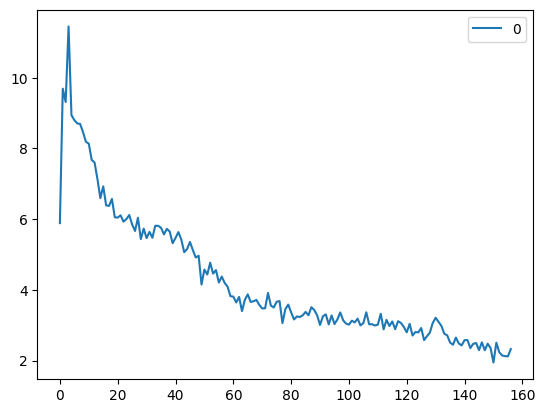

In [ ]:
pd.DataFrame(losses_10k).plot()

<Axes: >

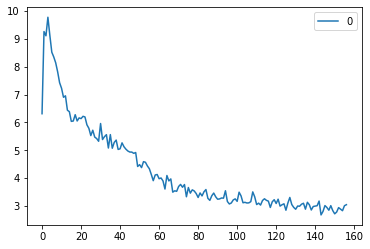

In [ ]:
pd.DataFrame(losses_10k).plot()

## 20K Model

In [ ]:
data_path_20k = '/content/drive/MyDrive/W266 Final Project/google_translated_data/gt_20k_dataset.csv'
trained_model_20k, losses_20k = train_pipeline(data_path_20k, train_model, tokenizer)

## 50K Model

In [ ]:
# 50k model took 6 minutes to train
data_path_50k = '/content/drive/MyDrive/W266 Final Project/df_25k.csv'
trained_model_50k, losses_50k = train_pipeline(data_path_50k, train_model, tokenizer)

## 100k model

In [ ]:
# 100k model took 14 minutes
data_path_100k = '/content/drive/MyDrive/W266 Final Project/df_50k.csv'
trained_model_100k, losses_100k = train_pipeline(data_path_100k, train_model, tokenizer)

## 200K Model

<Axes: >

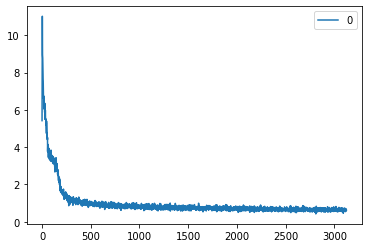

In [ ]:
losses_200k_df = pd.DataFrame(losses_200k)
losses_200k_df.plot()

In [ ]:
## 200k model took 20 minutes
data_path_200k = '/content/drive/MyDrive/W266 Final Project/df_100k.csv'
trained_model_200k, losses_200k = train_pipeline(data_path_200k, train_model, tokenizer)

# M2M-100 Models

## 10K Model

In [ ]:
m2m_data_path_10k = '/content/drive/MyDrive/W266 Final Project/m2m_translated_data/m2m_10k_dataset.csv'

m2m_trained_model_10k, m2m_losses_10k = train_pipeline(m2m_data_path_10k, train_model, tokenizer, 'm2m')

10k
data loaded
on gpu
Epoch 1/1
here
after forward pass
after backward pass
after step update
loss:  6.543159008026123
  Batch 1, Loss: 6.5432
here
after forward pass
after backward pass
after step update
loss:  9.588566780090332
  Batch 2, Loss: 8.0659
here
after forward pass
after backward pass
after step update
loss:  7.606108665466309
  Batch 3, Loss: 7.9126
here
after forward pass
after backward pass
after step update
loss:  7.2772297859191895
  Batch 4, Loss: 7.7538
here
after forward pass
after backward pass
after step update
loss:  5.691890239715576
  Batch 5, Loss: 7.3414
here
after forward pass
after backward pass
after step update
loss:  4.816404819488525
  Batch 6, Loss: 6.9206
here
after forward pass
after backward pass
after step update
loss:  4.339329719543457
  Batch 7, Loss: 6.5518
here
after forward pass
after backward pass
after step update
loss:  3.890199899673462
  Batch 8, Loss: 6.2191
here
after forward pass
after backward pass
after step update
loss:  3.8169293

## 20K Model

In [ ]:
m2m_data_path_20k = '/content/drive/MyDrive/W266 Final Project/m2m_translated_data/m2m_20k_dataset.csv'

m2m_trained_model_20k, m2m_losses_20k = train_pipeline(m2m_data_path_20k, train_model, tokenizer, 'm2m')

20k
data loaded
on gpu
Epoch 1/1
here
after forward pass
after backward pass
after step update
loss:  6.4046502113342285
  Batch 1, Loss: 6.4047
here
after forward pass
after backward pass
after step update
loss:  9.595268249511719
  Batch 2, Loss: 8.0000
here
after forward pass
after backward pass
after step update
loss:  10.023859024047852
  Batch 3, Loss: 8.6746
here
after forward pass
after backward pass
after step update
loss:  11.616325378417969
  Batch 4, Loss: 9.4100
here
after forward pass
after backward pass
after step update
loss:  9.72398853302002
  Batch 5, Loss: 9.4728
here
after forward pass
after backward pass
after step update
loss:  9.242072105407715
  Batch 6, Loss: 9.4344
here
after forward pass
after backward pass
after step update
loss:  8.703378677368164
  Batch 7, Loss: 9.3299
here
after forward pass
after backward pass
after step update
loss:  8.358681678771973
  Batch 8, Loss: 9.2085
here
after forward pass
after backward pass
after step update
loss:  8.096812

## 50K Model

In [ ]:
m2m_data_path_50k = '/content/drive/MyDrive/W266 Final Project/m2m_translated_data/m2m_50k_dataset.csv'

m2m_trained_model_50k, m2m_losses_50k = train_pipeline(m2m_data_path_50k, train_model, tokenizer, 'm2m')

50k
data loaded
on gpu
Epoch 1/1
here
after forward pass
after backward pass
after step update
loss:  6.138611316680908
  Batch 1, Loss: 6.1386
here
after forward pass
after backward pass
after step update
loss:  9.720385551452637
  Batch 2, Loss: 7.9295
here
after forward pass
after backward pass
after step update
loss:  7.416428089141846
  Batch 3, Loss: 7.7585
here
after forward pass
after backward pass
after step update
loss:  6.662507057189941
  Batch 4, Loss: 7.4845
here
after forward pass
after backward pass
after step update
loss:  5.371593952178955
  Batch 5, Loss: 7.0619
here
after forward pass
after backward pass
after step update
loss:  4.644304275512695
  Batch 6, Loss: 6.6590
here
after forward pass
after backward pass
after step update
loss:  4.310196399688721
  Batch 7, Loss: 6.3234
here
after forward pass
after backward pass
after step update
loss:  4.032688617706299
  Batch 8, Loss: 6.0371
here
after forward pass
after backward pass
after step update
loss:  3.73910236

## 100K Model

In [ ]:
m2m_data_path_100k = '/content/drive/MyDrive/W266 Final Project/m2m_translated_data/m2m_100k_dataset.csv'

m2m_trained_model_100k, m2m_losses_100k = train_pipeline(m2m_data_path_100k, train_model, tokenizer, 'm2m')

## 200K Model

In [ ]:
m2m_data_path_200k = '/content/drive/MyDrive/W266 Final Project/m2m_translated_data/m2m_200k_dataset.csv'

m2m_trained_model_200k, m2m_losses_200k = train_pipeline(m2m_data_path_200k, train_model, tokenizer, 'm2m')

# ChatGPT Models

## 10K Model

In [ ]:
gpt_data_path_10k = '/content/drive/MyDrive/W266 Final Project/gpt_translated_data/gpt_10k_dataset.csv'
gpt_trained_model_10k, gpt_losses_10k = train_pipeline(gpt_data_path_10k, train_model, tokenizer, 'gpt')

## 20K Model

In [ ]:
gpt_data_path_20k = '/content/drive/MyDrive/W266 Final Project/gpt_translated_data/gpt_20k_dataset.csv'
gpt_trained_model_20k, gpt_losses_20k = train_pipeline(gpt_data_path_20k, train_model, tokenizer, 'gpt')

## 50K Model

In [ ]:
gpt_data_path_50k = '/content/drive/MyDrive/W266 Final Project/gpt_translated_data/gpt_50k_dataset.csv'
gpt_trained_model_50k, gpt_losses_50k = train_pipeline(gpt_data_path_50k, train_model, tokenizer, 'gpt')

## 100k model

In [ ]:
gpt_data_path_100k = '/content/drive/MyDrive/W266 Final Project/gpt_translated_data/gpt_100k_dataset.csv'
gpt_trained_model_100k, gpt_losses_100k = train_pipeline(gpt_data_path_100k, train_model, tokenizer, 'gpt')

## 2nd Half 50K Model

In [ ]:
# train model using last 25K rows of gpt_100k_dataset to create a 50K dataset, 50K model uses first 25K rows
gpt_data_path_last_50k = '/content/drive/MyDrive/W266 Final Project/gpt_translated_data/gpt_last50k_dataset.csv'
gpt_trained_model_last_50k, gpt_losses_last_50k = train_pipeline(gpt_data_path_last_50k, train_model, tokenizer, 'gpt_last_50k')

# Reworded ChatGPT Models

## 10K Model

In [10]:
rw_data_path_10k = '/content/drive/MyDrive/W266 Final Project/gt_reworded_data/reword_10k_dataset.csv'
rw_trained_model_10k, rw_losses_10k, rw_train_epoch_losses_10k, rw_val_epoch_losses_10k = train_pipeline(rw_data_path_10k, train_model, tokenizer, 'rw')

10k
data loaded
on gpu
Epoch 1/4
here
after forward pass
after backward pass
after step update
loss:  5.083862781524658
  Batch 1, Loss: 5.0839
here
after forward pass
after backward pass
after step update
loss:  6.814765930175781
  Batch 2, Loss: 5.9493
here
after forward pass
after backward pass
after step update
loss:  5.431977272033691
  Batch 3, Loss: 5.7769
here
after forward pass
after backward pass
after step update
loss:  5.125519752502441
  Batch 4, Loss: 5.6140
here
after forward pass
after backward pass
after step update
loss:  4.319746017456055
  Batch 5, Loss: 5.3552
here
after forward pass
after backward pass
after step update
loss:  3.959989070892334
  Batch 6, Loss: 5.1226
here
after forward pass
after backward pass
after step update
loss:  3.8030011653900146
  Batch 7, Loss: 4.9341
here
after forward pass
after backward pass
after step update
loss:  3.6175811290740967
  Batch 8, Loss: 4.7696
here
after forward pass
after backward pass
after step update
loss:  3.869987

## 20K Model

In [ ]:
# 20k is 50k, 50k is 20k
rw_data_path_20k = '/content/drive/MyDrive/W266 Final Project/gt_reworded_data/reword_50k_dataset.csv'
rw_trained_model_20k, rw_losses_20k, rw_train_epoch_losses_20k, rw_val_epoch_losses_20k = train_pipeline(rw_data_path_20k, train_model, tokenizer, 'rw')

## 50K Model

In [ ]:
rw_data_path_50k = '/content/drive/MyDrive/W266 Final Project/gt_reworded_data/reword_20k_dataset.csv'
rw_trained_model_50k, rw_losses_50k, rw_train_epoch_losses_50k, rw_val_epoch_losses_50k = train_pipeline(rw_data_path_50k, train_model, tokenizer, 'rw')

## 100k model

In [ ]:
rw_data_path_100k = '/content/drive/MyDrive/W266 Final Project/gt_reworded_data/reword_100k_dataset.csv'
rw_trained_model_100k, rw_losses_100k, rw_train_epoch_losses_100k, rw_val_epoch_losses_100k = train_pipeline(rw_data_path_100k, train_model, tokenizer, 'rw')

# mBART Models

## 10K Model

In [ ]:
mbart_data_path_10k = '/content/drive/MyDrive/W266 Final Project/mBART_translated_data/mBART_10k_dataset.csv'
mbart_trained_model_10k, mbart_losses_10k = train_pipeline(mbart_data_path_10k, train_model, tokenizer, 'mbart')

## 20K Model

In [ ]:
mbart_data_path_20k = '/content/drive/MyDrive/W266 Final Project/mBART_translated_data/mBART_20k_dataset.csv'
mbart_trained_model_20k, mbart_losses_20k = train_pipeline(mbart_data_path_20k, train_model, tokenizer, 'mbart')

## 50K Model

In [ ]:
mbart_data_path_50k = '/content/drive/MyDrive/W266 Final Project/mBART_translated_data/mBART_50k_dataset.csv'
mbart_trained_model_50k, mbart_losses_50k = train_pipeline(mbart_data_path_50k, train_model, tokenizer, 'mbart')

## 100K Model

In [ ]:
mbart_data_path_100k = '/content/drive/MyDrive/W266 Final Project/mBART_translated_data/mBART_100k_dataset.csv'
mbart_trained_model_100k, mbart_losses_100k = train_pipeline(mbart_data_path_100k, train_model, tokenizer, 'mbart')

## 200K Model

In [ ]:
mbart_data_path_200k = '/content/drive/MyDrive/W266 Final Project/mBART_translated_data/mBART_200k_dataset.csv'
# mbart_trained_model_200k, mbart_losses_200k = train_pipeline(mbart_data_path_200k, train_model, tokenizer, 'mbart')

In [ ]:
# 2nd time training with train/val epoch loss
mbart_trained_model_200k, batch_losses_200k, train_epoch_losses_200k, val_epoch_losses_200k = train_pipeline(mbart_data_path_200k, train_model, tokenizer, 'mbart_train_val_epoch')

## 2nd 10K dataset

In [ ]:
# train model using last 5K rows only to create 2nd half 10K dataset
# 10K dataset uses first 5K rows to create 10K dataset
mbart_data_path_last_10k = '/content/drive/MyDrive/W266 Final Project/mBART_translated_data/mBART_last10k_dataset.csv'
mbart_trained_model_last_10k, mbart_losses_last_10k = train_pipeline(mbart_data_path_last_10k, train_model, tokenizer, 'mbart_last_10k')


## 2nd 100K Dataset

In [ ]:
# then train model using last 50K rows to create the 2nd half 100K dataset
# 100K model uses first 50K rows
mbart_data_path_last_100k = '/content/drive/MyDrive/W266 Final Project/mBART_translated_data/mBART_last100k_dataset.csv'
mbart_trained_model_last_100k, mbart_losses_last_100k = train_pipeline(mbart_data_path_last_100k, train_model, tokenizer, 'mbart_last_100k')

# Data Visualizations

In [5]:
import pandas as pd

mbart_losses = pd.read_csv('/content/drive/MyDrive/W266 Final Project/mbart_train_val_epoch_200k_train_val_losses.csv')
mbart_losses.columns = ['index', 'training_loss', 'validation_loss']

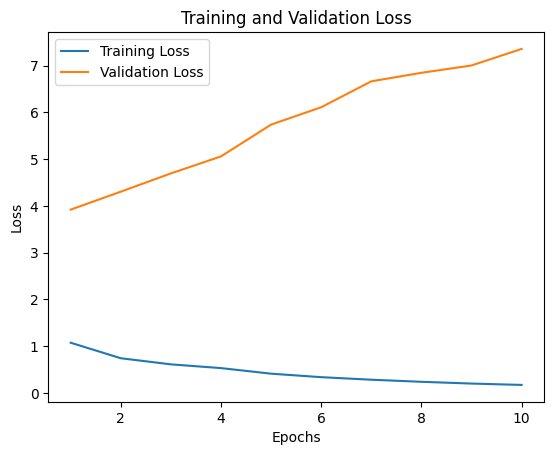

In [6]:
# plot train/val loss curves for Google Translate and mBART models


import matplotlib.pyplot as plt

# training and validation loss values
train_loss = mbart_losses['training_loss'].values
val_loss = mbart_losses['validation_loss'].values

# create a figure and axis
fig, ax = plt.subplots()

# set x and y axis labels and title
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Training and Validation Loss')

# plot training and validation loss curves
ax.plot(range(1, len(train_loss)+1), train_loss, label='Training Loss')
ax.plot(range(1, len(val_loss)+1), val_loss, label='Validation Loss')

# add a legend to the plot
ax.legend()

# display the plot
plt.show()


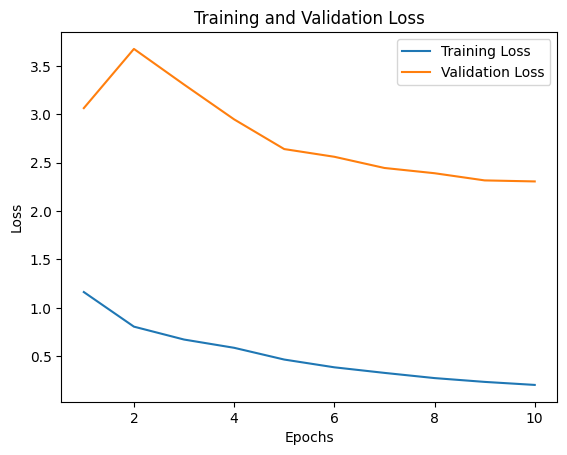

In [7]:
google_translate_losses = pd.read_csv('/content/drive/MyDrive/W266 Final Project/google_translate_train_val_epoch_200k_train_val_losses.csv')
google_translate_losses.columns = ['index', 'training_loss', 'validation_loss']

# training and validation loss values
train_loss = google_translate_losses['training_loss'].values
val_loss = google_translate_losses['validation_loss'].values

# create a figure and axis
fig, ax = plt.subplots()

# set x and y axis labels and title
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Training and Validation Loss')

# plot training and validation loss curves
ax.plot(range(1, len(train_loss)+1), train_loss, label='Training Loss')
ax.plot(range(1, len(val_loss)+1), val_loss, label='Validation Loss')

# add a legend to the plot
ax.legend()

# display the plot
plt.show()
